# **Helmet Detection Using Yolo 11**

##### Dataset: https://universe.roboflow.com/yolo-do-it-yhopz/helmet-detector-9rzmg-bmd6q

In [1]:
!nvidia-smi

Thu Oct 31 11:46:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 1 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 878.7/878.7 kB 23.3 MB/s eta 0:00:00


**Step 2 # Import all the required libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step 3 # Download Dataset from Roboflow**

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tWoCSS3MHs9V8txYcE2h")
project = rf.workspace("yolo-do-it-yhopz").project("helmet-detector-9rzmg-bmd6q")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detector-1 in yolov11:: 100%|██████████| 5696/5696 [00:00<00:00, 6153.13it/s]


In [8]:
dataset.location

'/content/Helmet-Detector-1'

**Step 4 # Trains YOLO11 Model on a Custom Dataset**

In [9]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 109MB/s]
Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Helmet-Detector-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

**Step 5 # Examine Training Results**

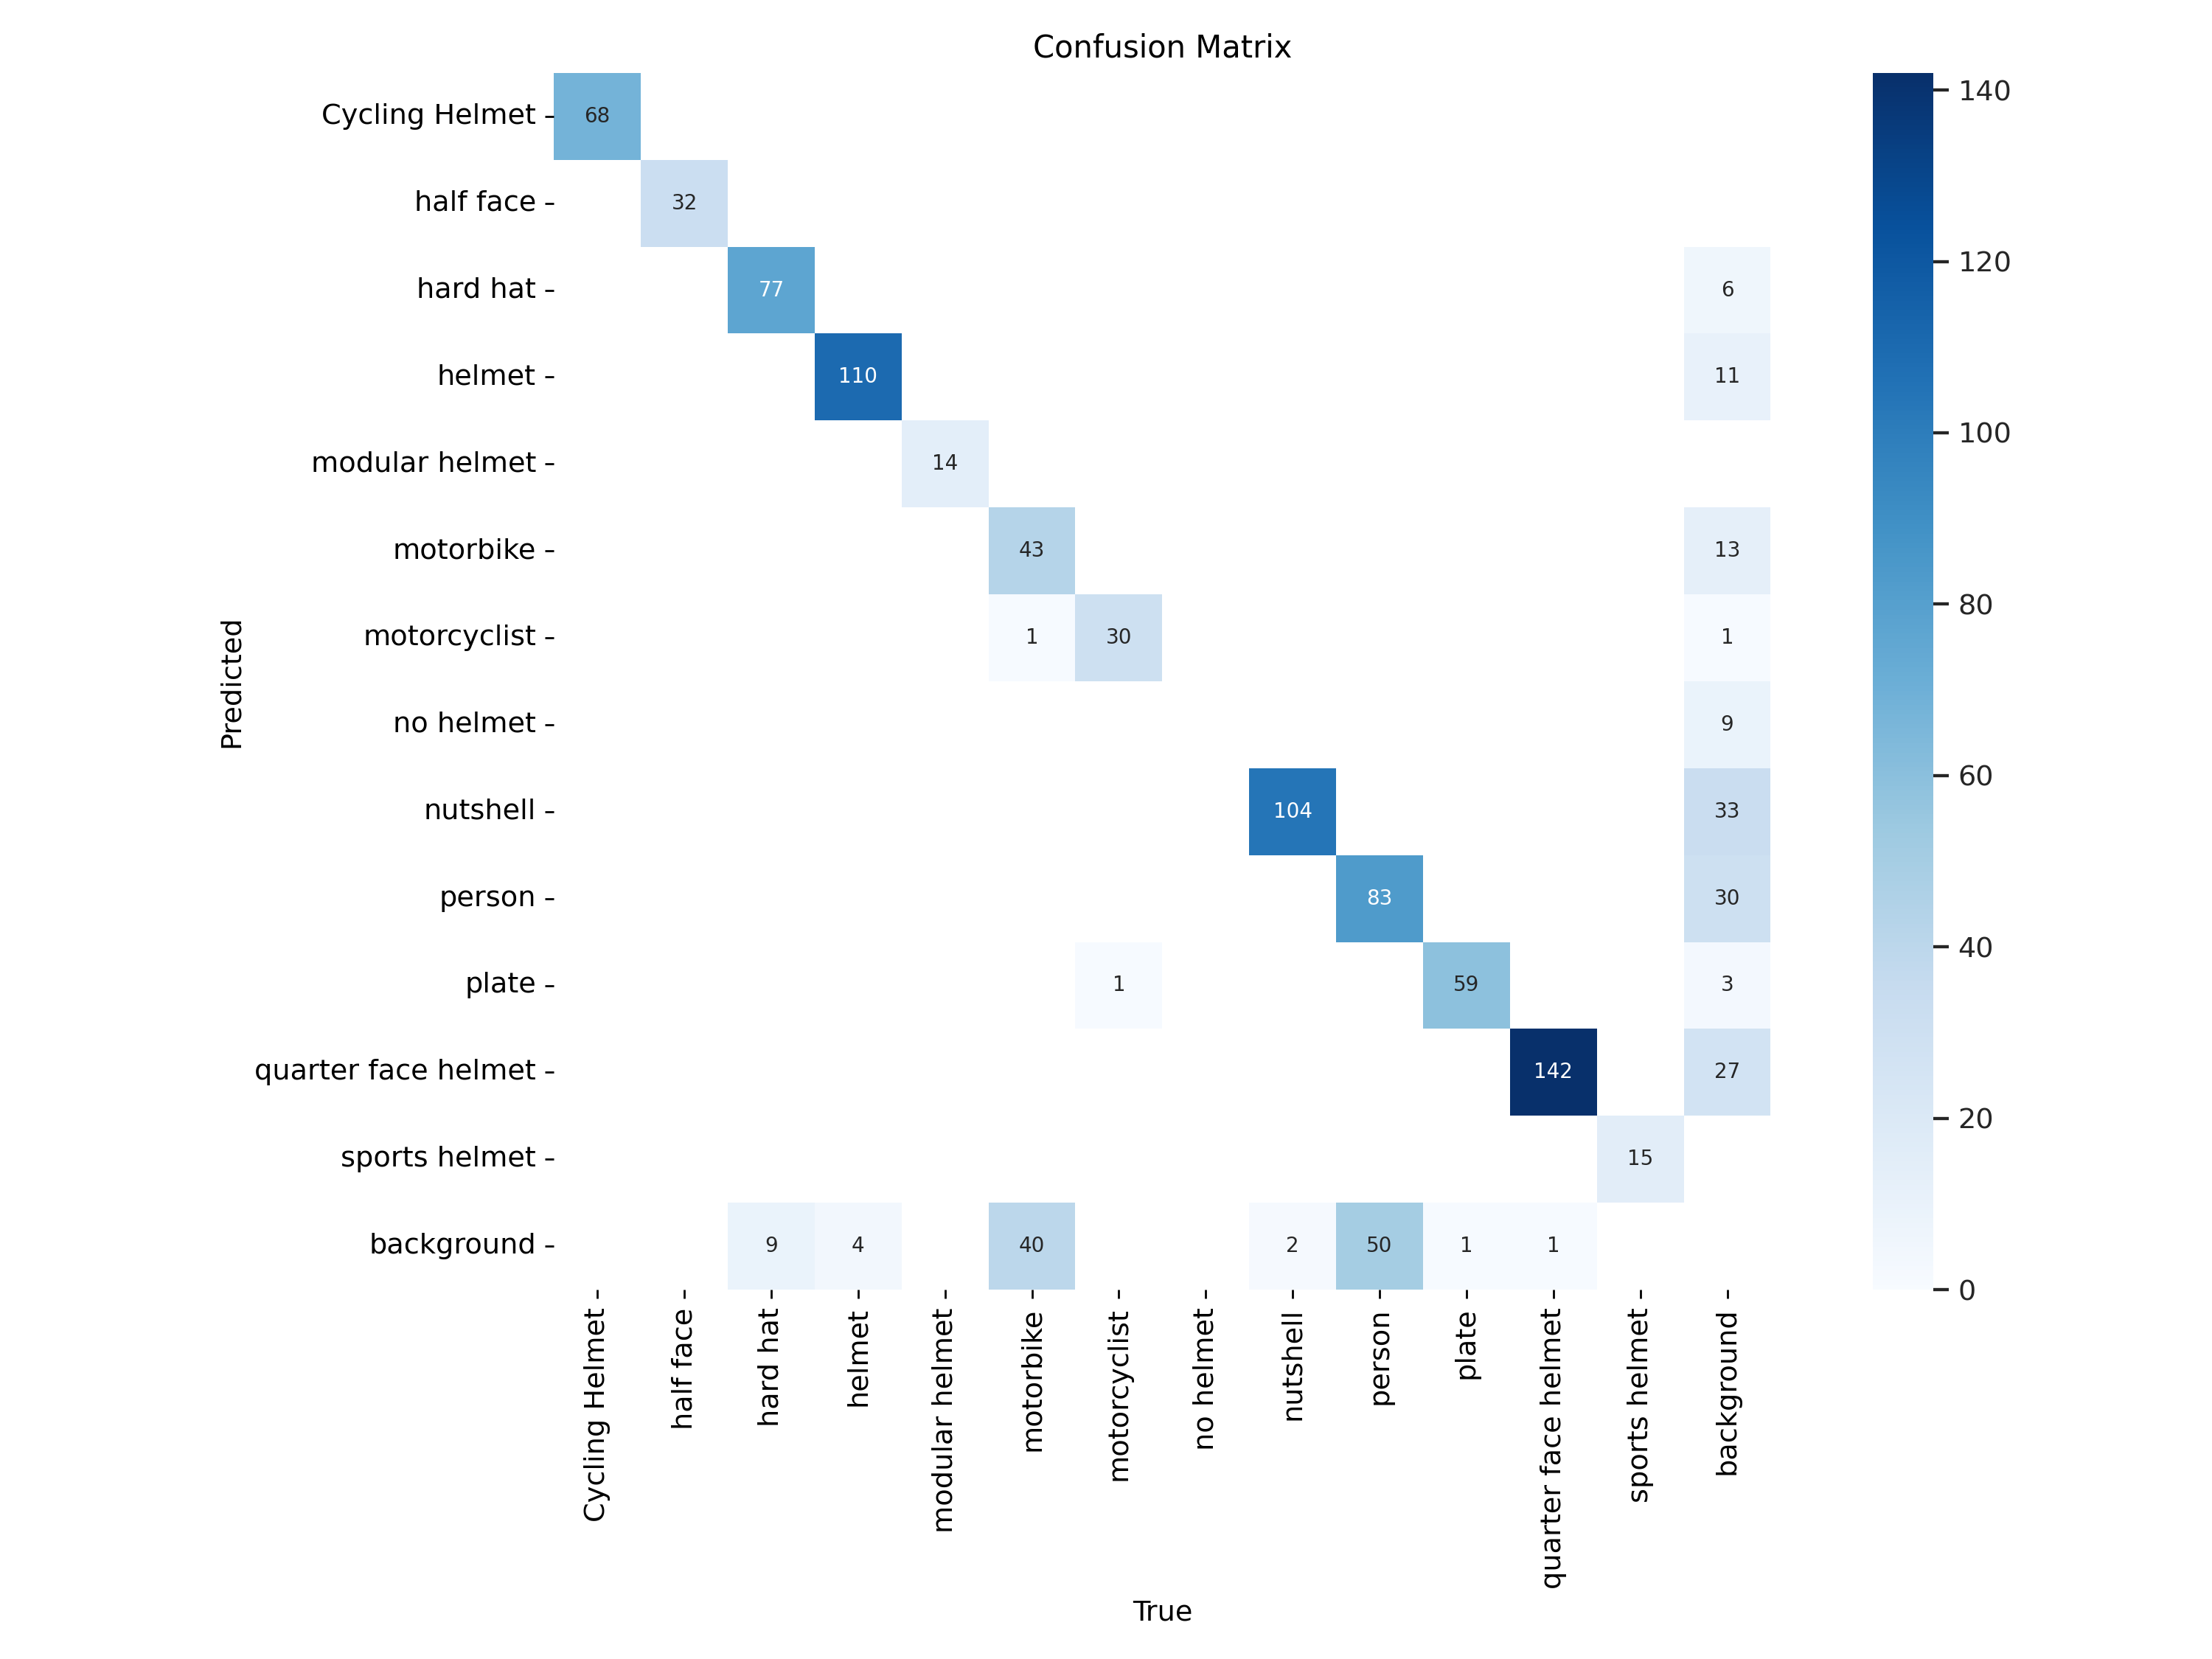

In [11]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

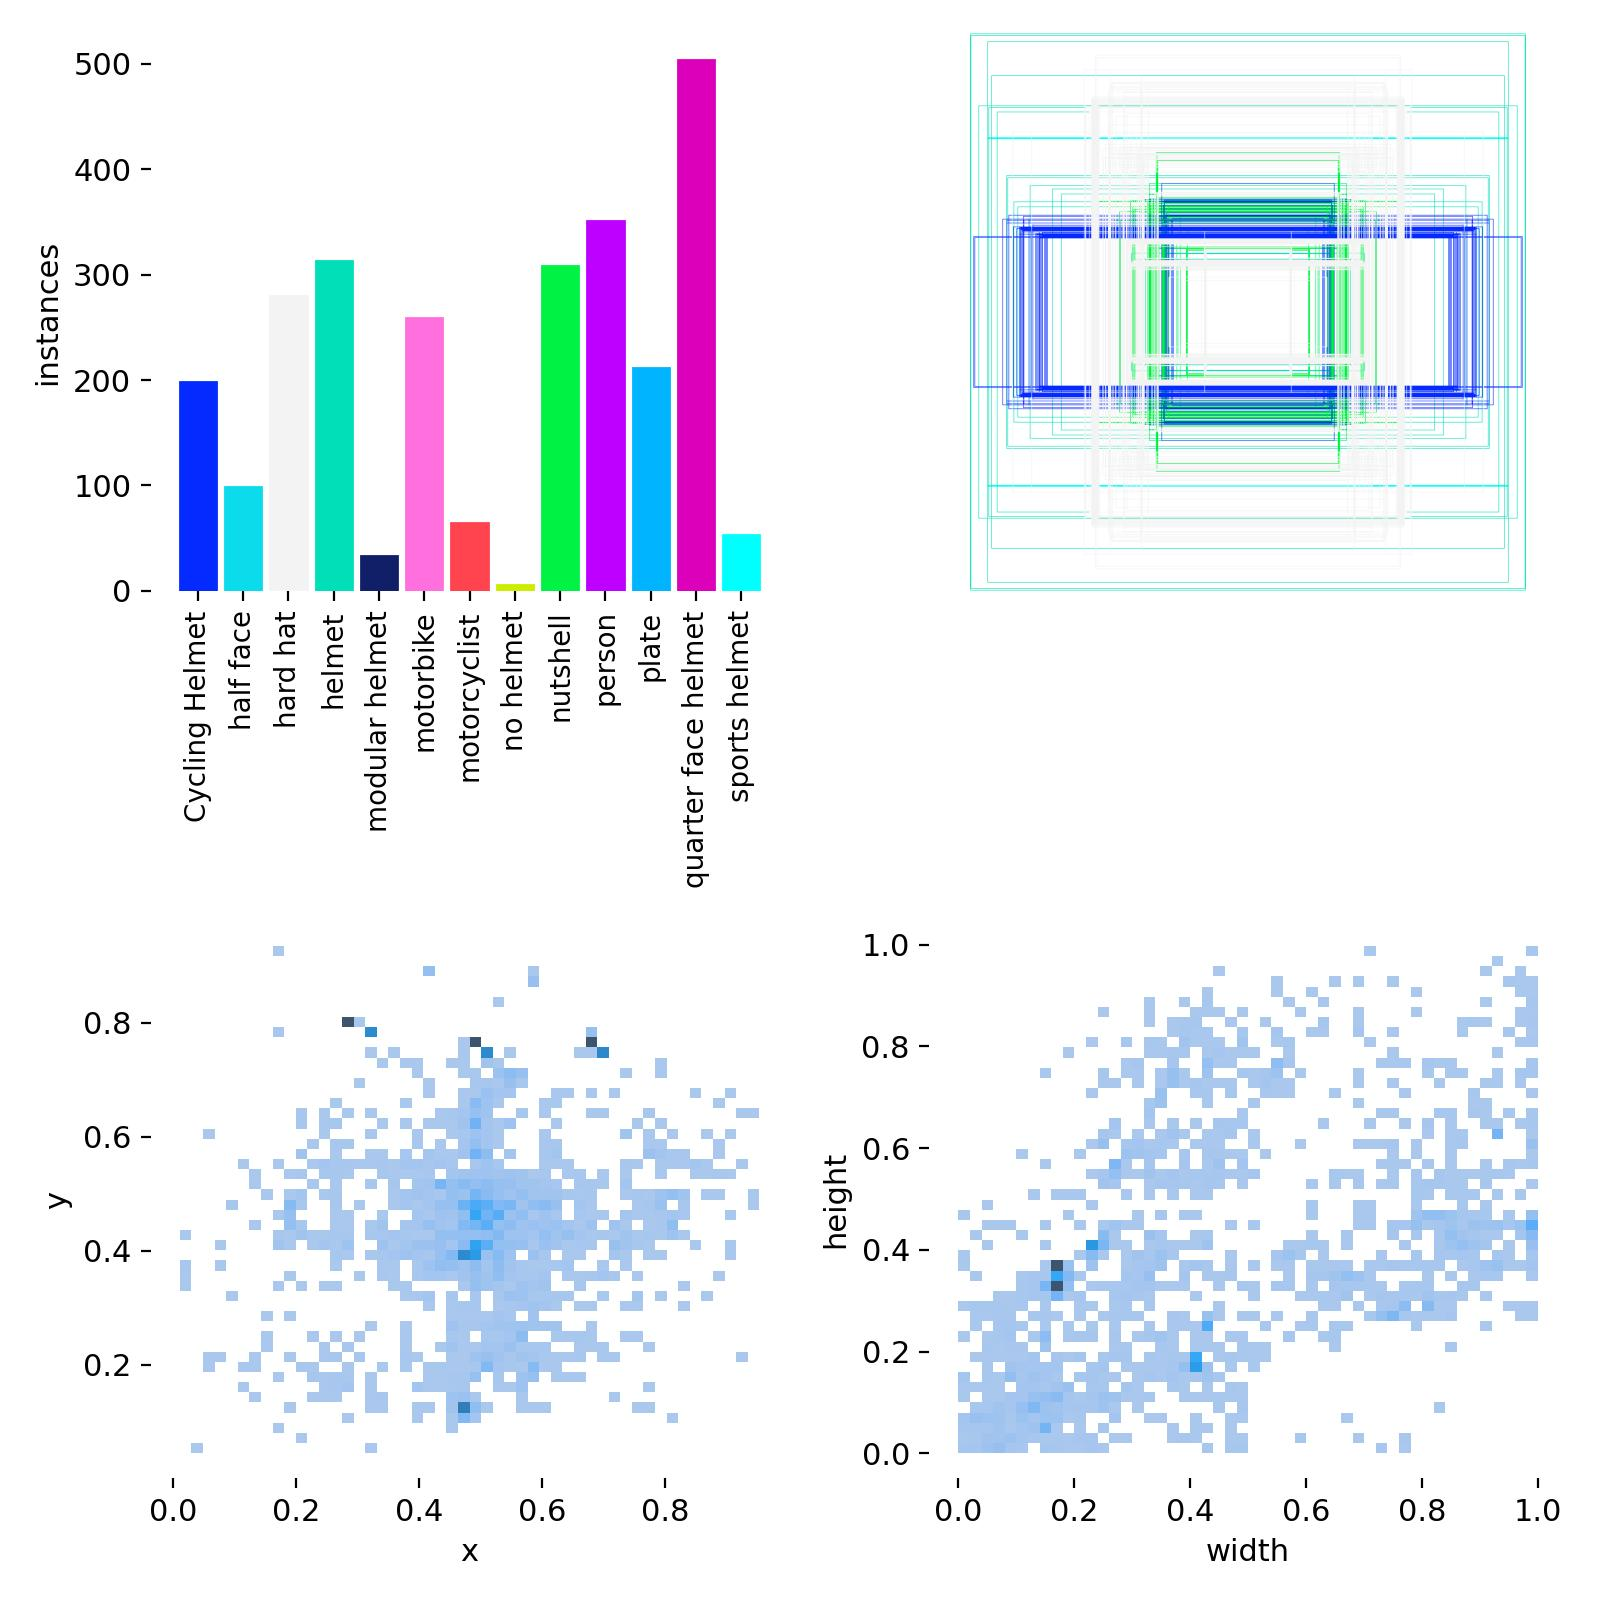

In [14]:
Image("/content/runs/detect/train/labels.jpg", width=600)

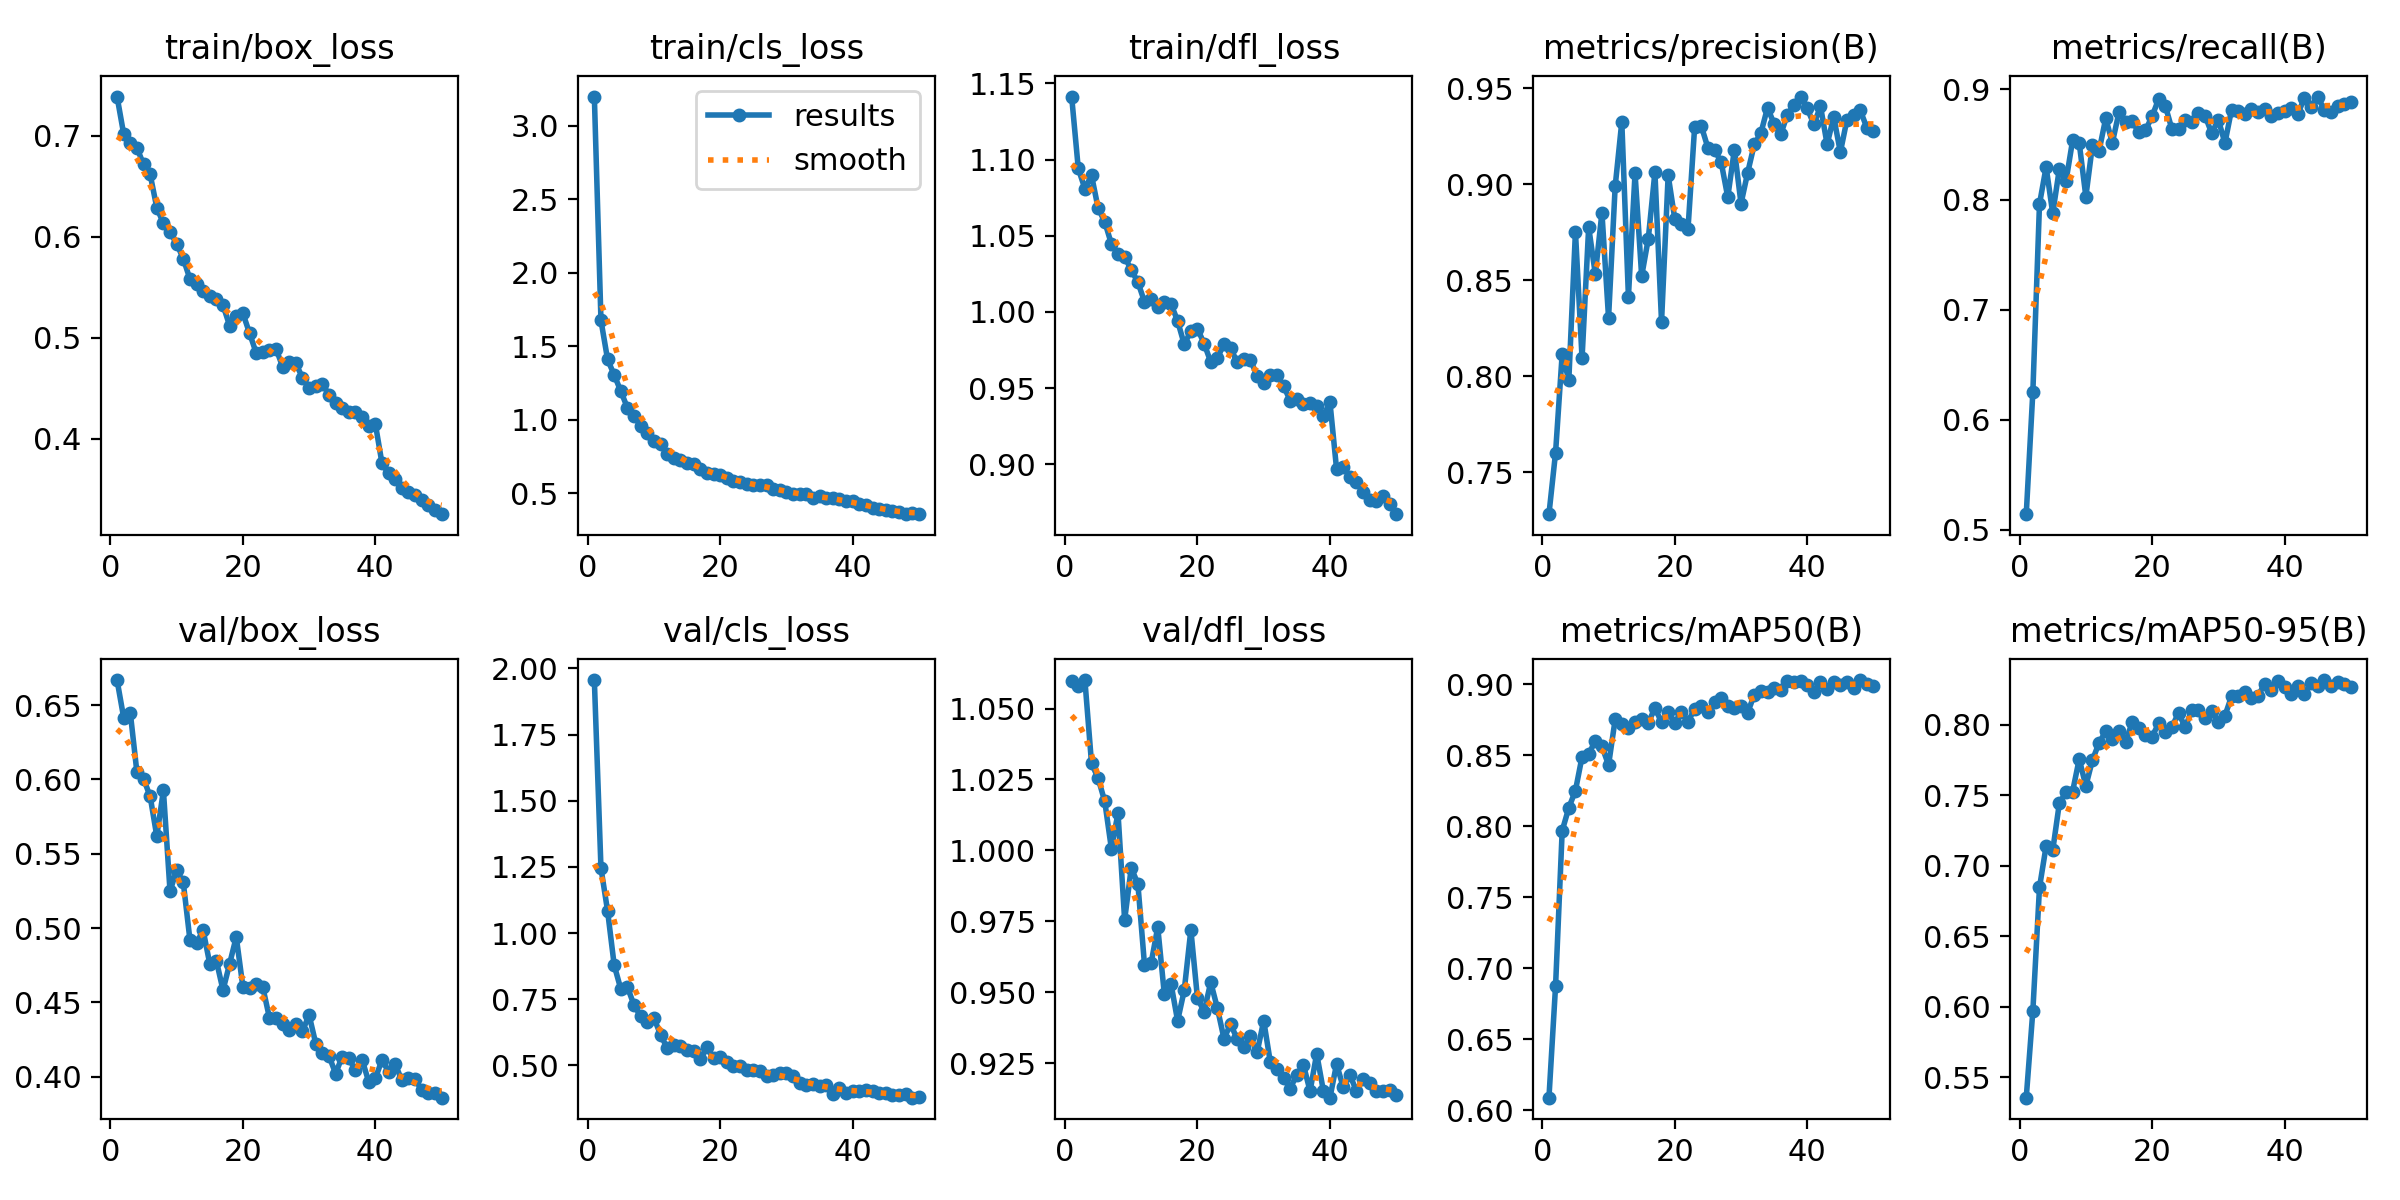

In [16]:
Image("/content/runs/detect/train/results.png", width=700)

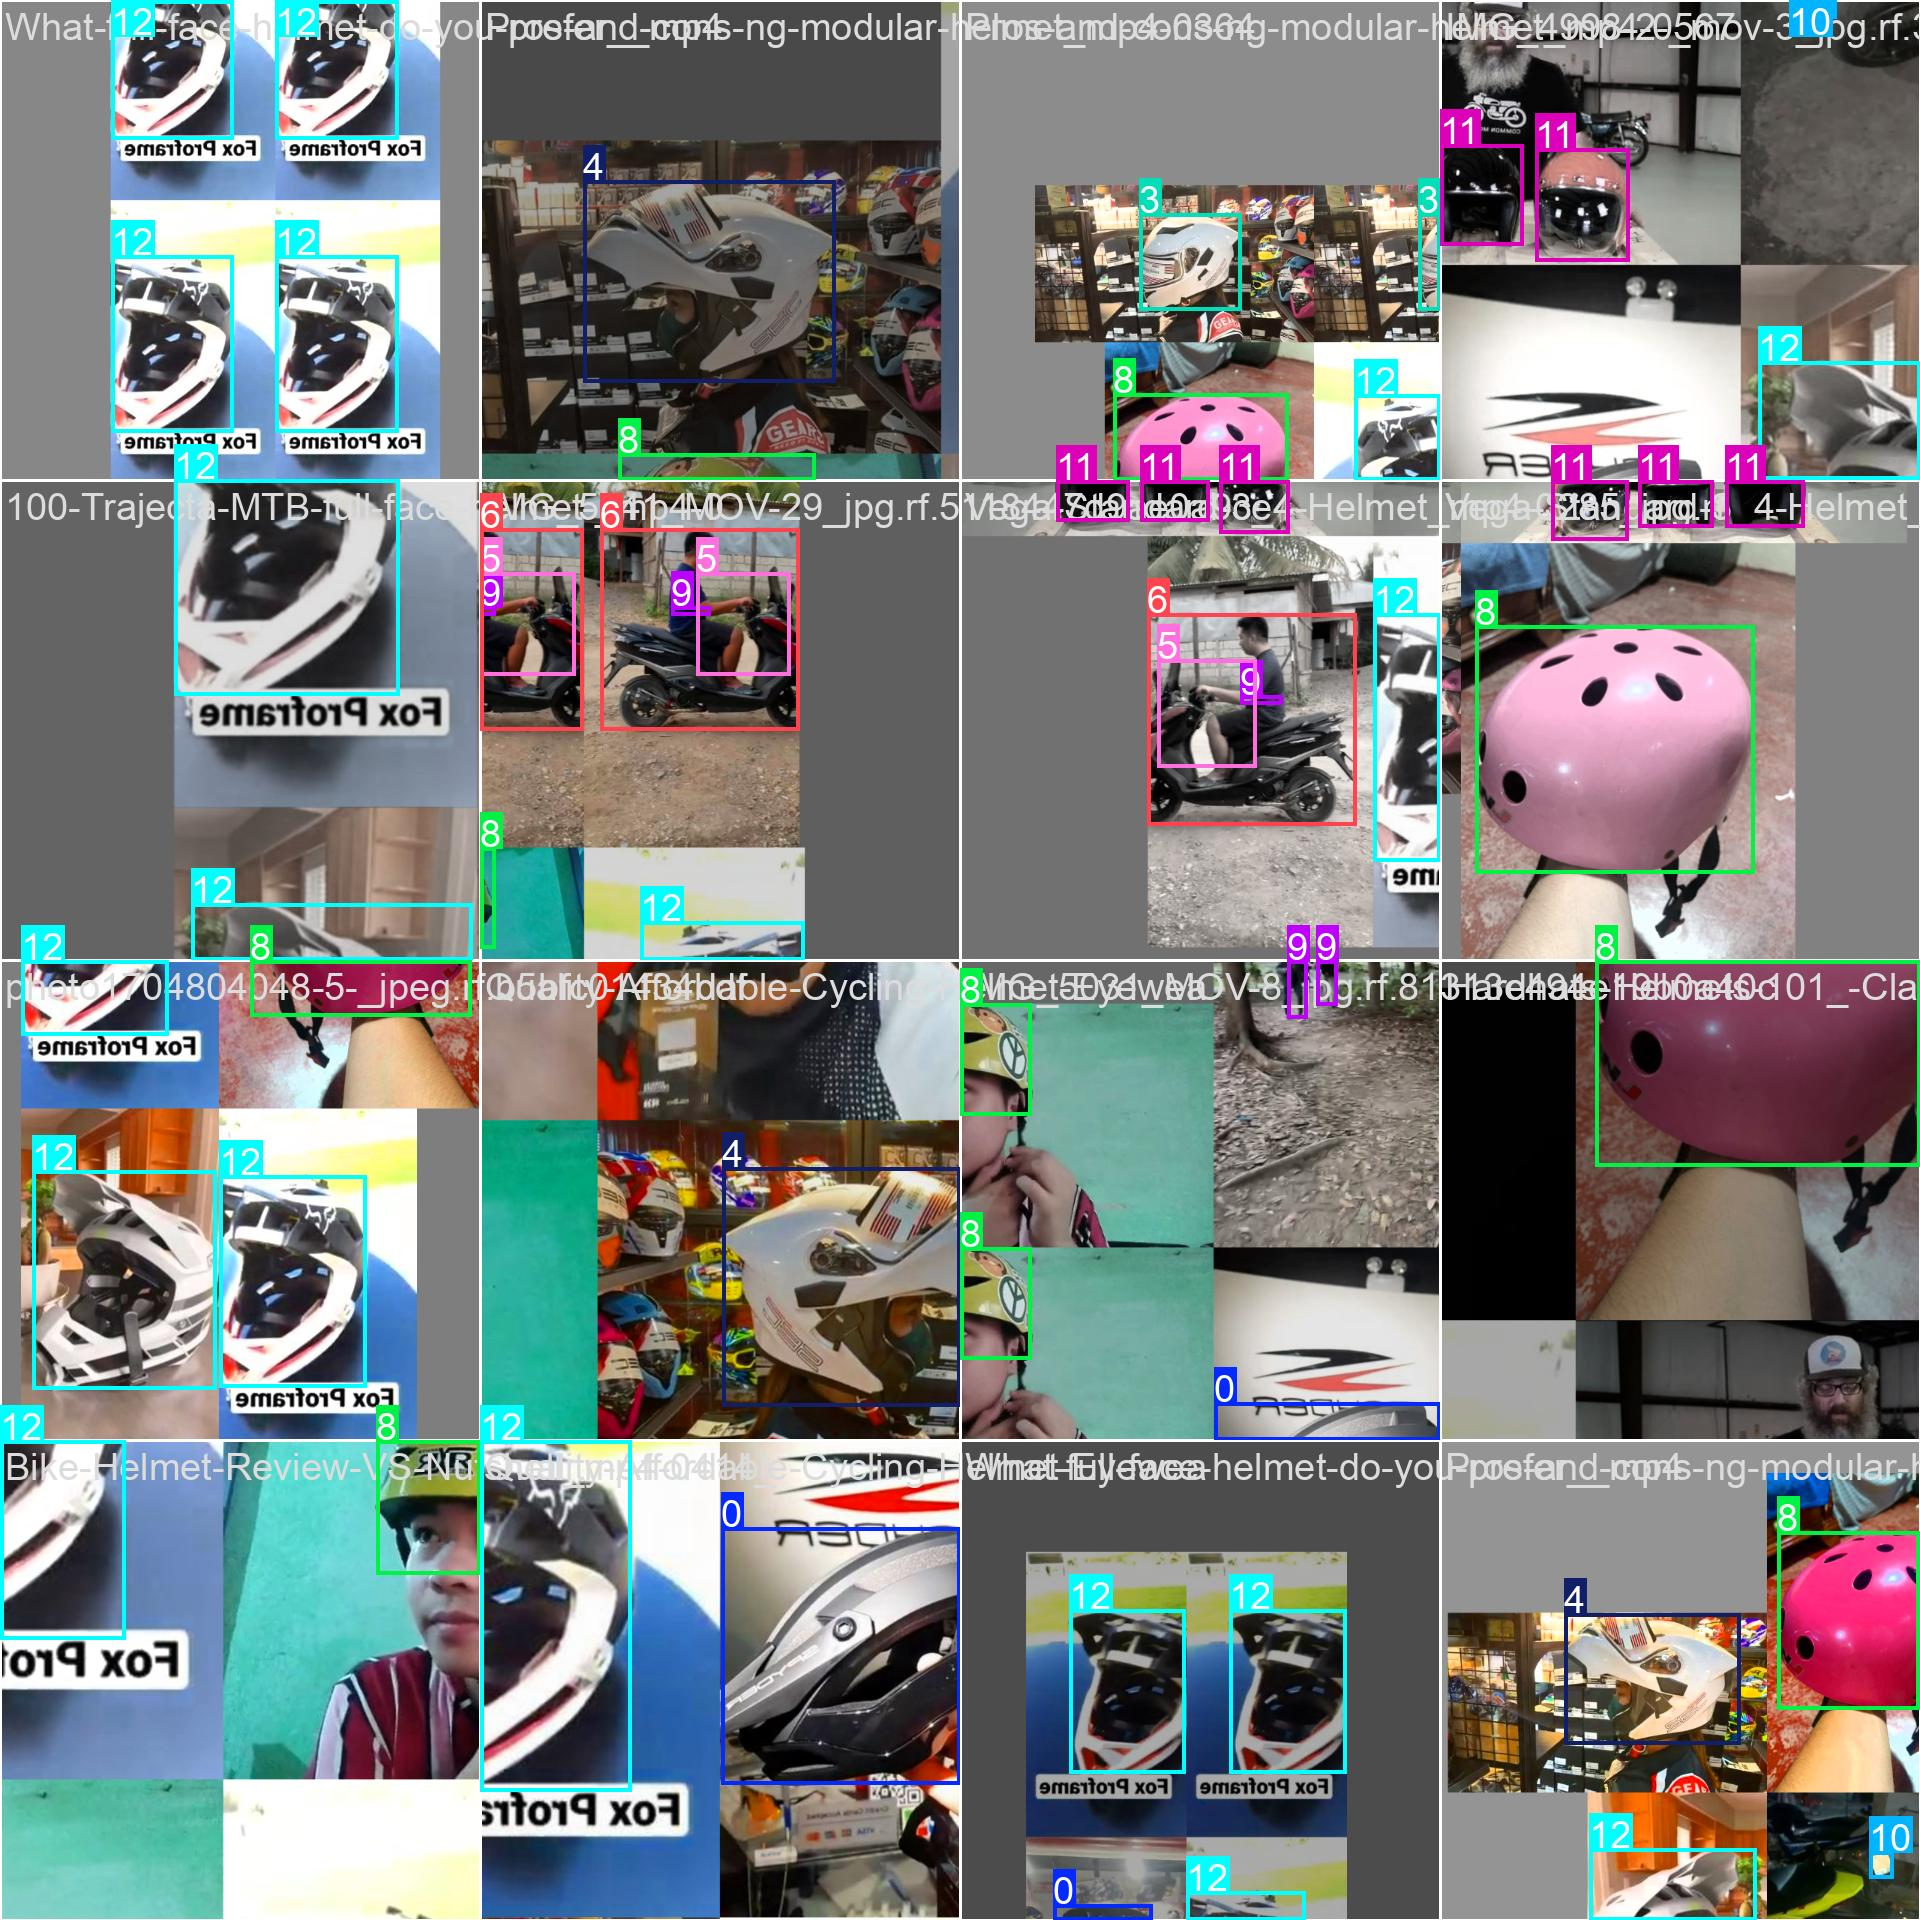

In [17]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

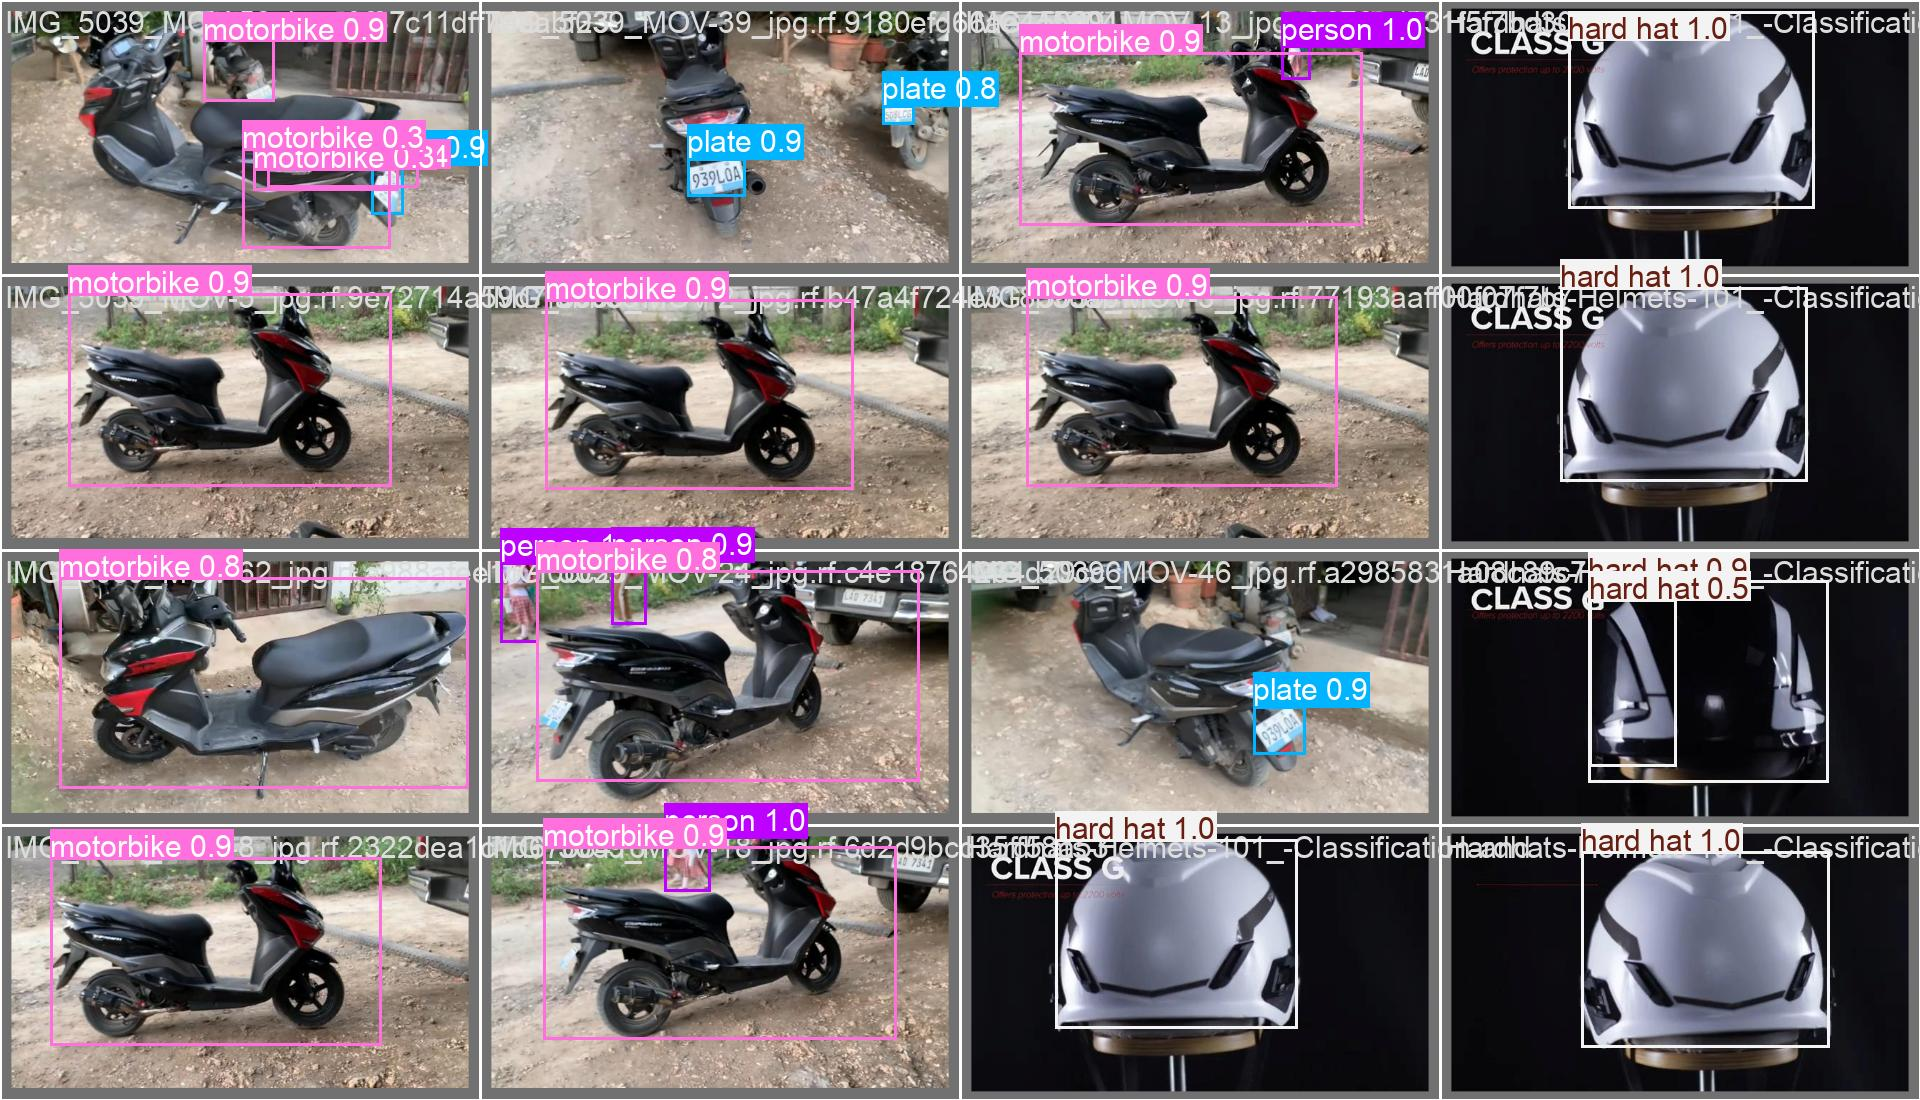

In [19]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

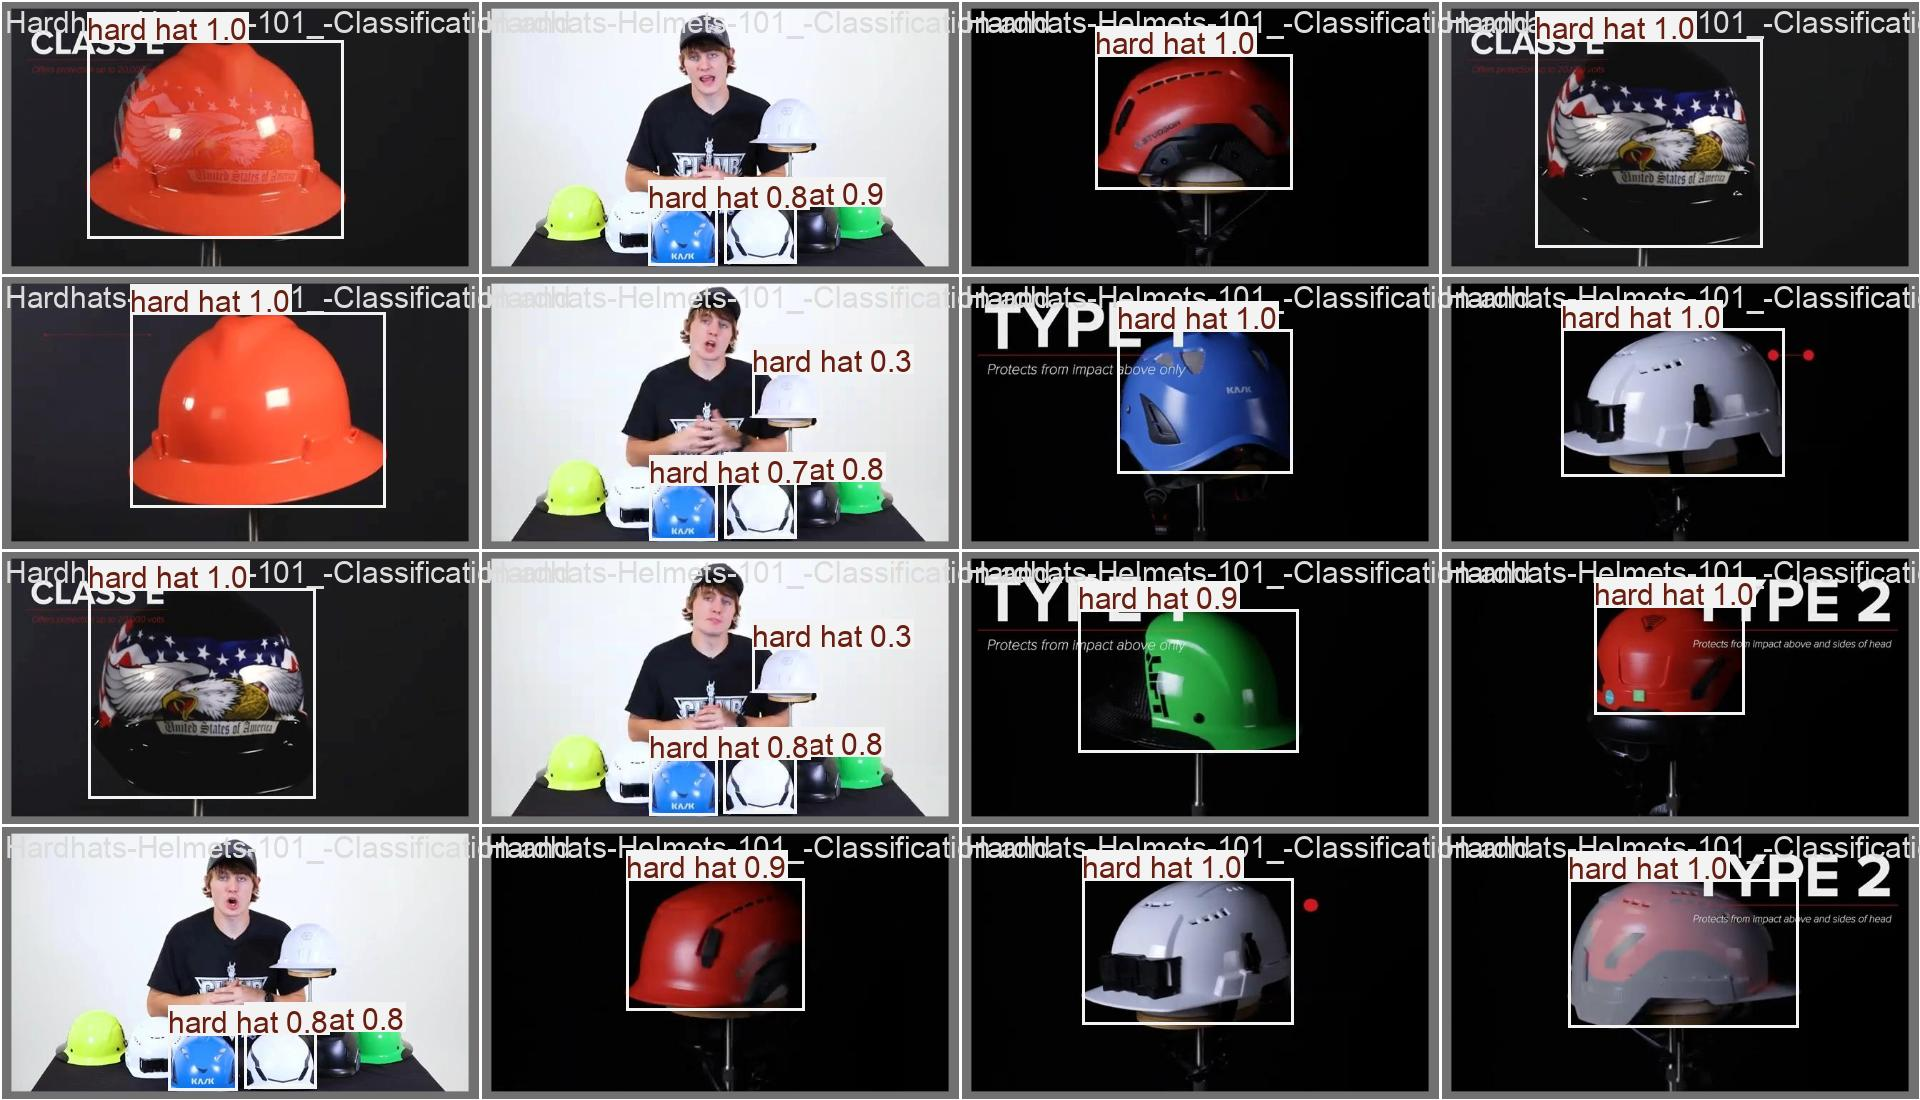

In [24]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step 8 # Inference with Custom Model on Images**

In [20]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0178_jpg.rf.40daedd08d8ee073d606a4e59773f75d.jpg: 640x384 1 sports helmet, 55.3ms
image 2/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.53fbc18ec2d3dbc33fa2ca90fe4d27f6.jpg: 640x384 1 sports helmet, 9.2ms
image 3/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0186_jpg.rf.4b0cfc853a5cddb12cc069cd568ee13f.jpg: 640x384 1 sports helmet, 8.4ms
image 4/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.ab2c103b611fa0377e8d8833d0d99e72.jpg: 640x384 1 sports helmet, 8.0ms
image 5/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg: 640x384 1

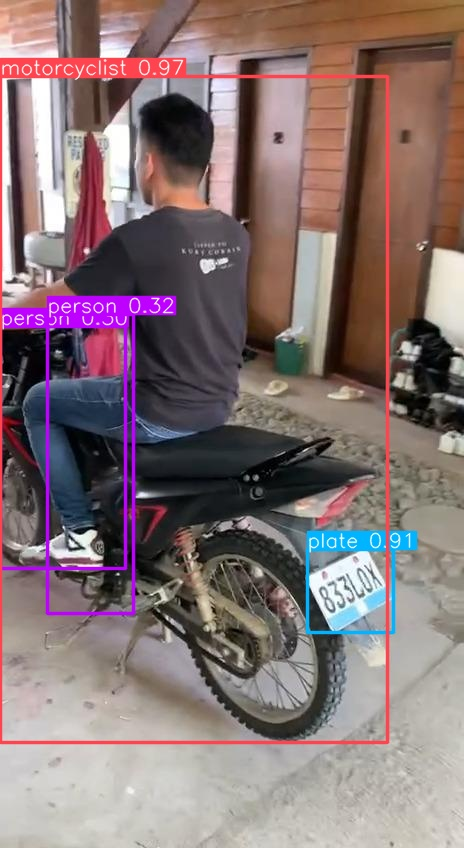

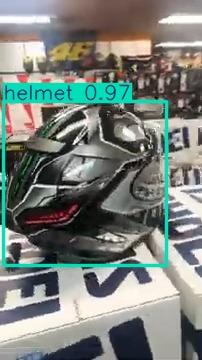

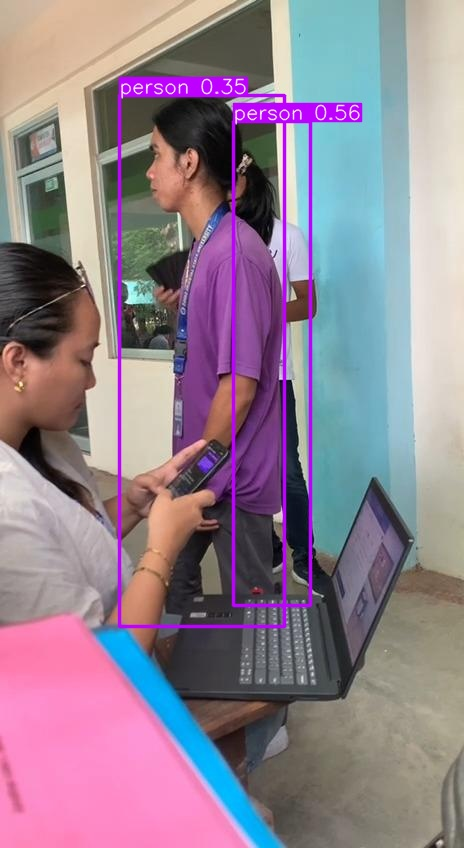

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [33]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=no_helm.jpg save=True

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/no_helm.jpg: 448x640 1 person, 75.4ms
Speed: 4.1ms preprocess, 75.4ms inference, 727.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


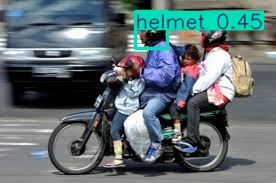

In [32]:
Image("/content/runs/detect/predict2/helm.jpg", width=600)

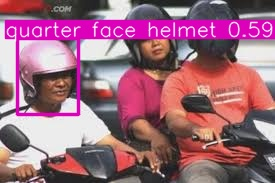

In [31]:
Image("/content/runs/detect/predict3/helmet.jpg", width=600)

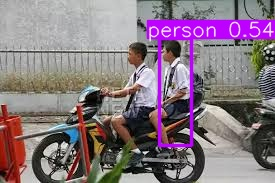

In [34]:
Image("/content/runs/detect/predict4/no_helm.jpg", width=600)

**# Inference with Custom Model on Videos**

In [36]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_video.mp4" save=True

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/174) /content/PPE_video.mp4: 352x640 (no detections), 44.9ms
video 1/1 (frame 2/174) /content/PPE_video.mp4: 352x640 (no detections), 9.0ms
video 1/1 (frame 3/174) /content/PPE_video.mp4: 352x640 (no detections), 9.0ms
video 1/1 (frame 4/174) /content/PPE_video.mp4: 352x640 (no detections), 8.7ms
video 1/1 (frame 5/174) /content/PPE_video.mp4: 352x640 (no detections), 8.3ms
video 1/1 (frame 6/174) /content/PPE_video.mp4: 352x640 (no detections), 8.4ms
video 1/1 (frame 7/174) /content/PPE_video.mp4: 352x640 (no detections), 8.1ms
video 1/1 (frame 8/174) /content/PPE_video.mp4: 352x640 (no detections), 11.7ms
video 1/1 (frame 9/174) /content/PPE_video.mp4: 352x640 (no detections), 8.9ms
video 1/1 (frame 10/174) /content/PPE_video.mp4: 352x640 (no detections), 8.2ms
video 1/1 (frame 11/174) /content/PPE_vid

In [38]:
from IPython.display import HTML
from base64 import b64encode

# Input video path
save_path = '/content/runs/detect/predict5/PPE_video.avi'
compressed_path = "/content/result_compressed.mp4"

# Compress video
!ffmpeg -i {save_path} -vcodec libx264 {compressed_path}

# Display video
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width="600" controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [39]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="helmet1.mp4" save=True

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/161) /content/helmet1.mp4: 384x640 (no detections), 45.1ms
video 1/1 (frame 2/161) /content/helmet1.mp4: 384x640 (no detections), 8.5ms
video 1/1 (frame 3/161) /content/helmet1.mp4: 384x640 (no detections), 8.2ms
video 1/1 (frame 4/161) /content/helmet1.mp4: 384x640 (no detections), 7.9ms
video 1/1 (frame 5/161) /content/helmet1.mp4: 384x640 (no detections), 9.2ms
video 1/1 (frame 6/161) /content/helmet1.mp4: 384x640 (no detections), 7.9ms
video 1/1 (frame 7/161) /content/helmet1.mp4: 384x640 (no detections), 7.9ms
video 1/1 (frame 8/161) /content/helmet1.mp4: 384x640 (no detections), 7.7ms
video 1/1 (frame 9/161) /content/helmet1.mp4: 384x640 (no detections), 8.0ms
video 1/1 (frame 10/161) /content/helmet1.mp4: 384x640 (no detections), 7.7ms
video 1/1 (frame 11/161) /content/helmet1.mp4: 384x640 (no det

In [40]:
from IPython.display import HTML
from base64 import b64encode

# Input video path
save_path = '/content/runs/detect/predict6/helmet1.avi'
compressed_path = "/content/result2_compressed.mp4"

# Compress video
!ffmpeg -i {save_path} -vcodec libx264 {compressed_path}

# Display video
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width="600" controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [41]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE2.mp4" save=True

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/268) /content/PPE2.mp4: 352x640 (no detections), 46.0ms
video 1/1 (frame 2/268) /content/PPE2.mp4: 352x640 (no detections), 8.8ms
video 1/1 (frame 3/268) /content/PPE2.mp4: 352x640 (no detections), 8.2ms
video 1/1 (frame 4/268) /content/PPE2.mp4: 352x640 (no detections), 8.1ms
video 1/1 (frame 5/268) /content/PPE2.mp4: 352x640 (no detections), 8.3ms
video 1/1 (frame 6/268) /content/PPE2.mp4: 352x640 (no detections), 8.9ms
video 1/1 (frame 7/268) /content/PPE2.mp4: 352x640 (no detections), 8.1ms
video 1/1 (frame 8/268) /content/PPE2.mp4: 352x640 (no detections), 8.3ms
video 1/1 (frame 9/268) /content/PPE2.mp4: 352x640 (no detections), 8.0ms
video 1/1 (frame 10/268) /content/PPE2.mp4: 352x640 (no detections), 8.0ms
video 1/1 (frame 11/268) /content/PPE2.mp4: 352x640 (no detections), 8.0ms
video 1/1 (frame 

In [42]:
from IPython.display import HTML
from base64 import b64encode

# Input video path
save_path = '/content/runs/detect/predict7/PPE2.avi'
compressed_path = "/content/result3_compressed.mp4"

# Compress video
!ffmpeg -i {save_path} -vcodec libx264 {compressed_path}

# Display video
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width="600" controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab